## Imports

In [48]:
import numpy as np
import numba as nb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

from tqdm import tqdm


In [49]:
# https://stackoverflow.com/questions/9786102/how-do-i-parallelize-a-simple-python-loop
import asyncio

def background(f):
    def wrapped(*args, **kwargs):
        return asyncio.get_event_loop().run_in_executor(None, f, *args, **kwargs)

    return wrapped

In [50]:
@background
def effective_dimension(X, eps=1e-11):
    pca = PCA(random_state=0)
    pca.fit(X)
    p = pca.explained_variance_ratio_
    s = -np.sum(p*np.log(p + eps))

    return np.exp(s)

## Loading data files

In [51]:
width_N = 400
game = 'Montezuma'

In [52]:
#log_path='../storage/montezuma_N400'

In [53]:
#log_path='../storage/montezuma_N400_Reg0_5'

In [54]:
#log_path='../storage/pong_N400'

In [55]:
log_path='../storage/my_logs'

In [56]:
event_files = [f for f in listdir(log_path) if isfile(join(log_path, f))]
event_files = sorted(event_files)
len(event_files)

45

In [57]:
max_loop = len(event_files)
loops_enum = list(range(max_loop))

In [58]:
loop_table = ['L_' + str(loop) for loop in range(15 + 0 * max_loop)]

In [59]:
#print(loop_table[:100])

In [60]:
loop_table_dict = dict(enumerate(loop_table))
loops_dict = {v: k for k, v in loop_table_dict.items()}

In [61]:
loops_set = set()
for i in range(len(event_files)):
    for loop_id in loop_table:
        if loop_id in event_files[i]: 
            loops_set.add(loops_dict[loop_id])
            #print(loops_dict[loop_id], loop_id, event_files[i])

In [62]:
#loops_set

In [63]:
max_loop = max(loops_set)

## max_loop ovewrite

In [64]:
#max_loop = 17

In [65]:
max_loop

2

In [66]:
#loop_table = ['L_' + str(loop) for loop in range(max_loop, max_loop + 1)]

loop_table = ['L_' + str(loop) + '_' for loop in range(max_loop + 1)]

In [67]:
loop_table

['L_0_', 'L_1_', 'L_2_']

In [68]:
event_files = [event_file for event_file in event_files if any(loop_id in event_file for loop_id in loop_table)]

In [69]:
#event_files

In [70]:
len(event_files)

45

In [71]:
data_files = [np.load(log_path + '/' + event_files[i]) for i in range(len(event_files))]

In [72]:
len(data_files)

45

## Extracting data

# !! It seems with dimeff episodes are much shorter

In [73]:
dimeffs = []

for i in tqdm(range(len(data_files))):
    dimeffs.append([data_files[i]['step'].item(), effective_dimension(data_files[i]['x_out']) ] )

#[[data_files[i]['step'].item(), effective_dimension(data_files[i]['x_out'])] \
#           for i in range(len(data_files))]

100%|██████████| 45/45 [01:22<00:00,  1.83s/it]


In [74]:
aux = []

for i in tqdm(range(len(data_files))):
    aux.append([dimeffs[i][0], dimeffs[i][1].result()] )


100%|██████████| 45/45 [00:00<00:00, 392398.50it/s]


In [75]:
dimeffs = aux

In [76]:
rewards = [[data_files[i]['step'].item(), data_files[i]['reward'].item()] for i in range(len(data_files))]

In [77]:
steps = [data_files[i]['step'].item() for i in range(len(data_files))]

In [78]:
#loops = [data_files[i]['loop'].item() for i in range(len(data_files))]

In [79]:
loops = [[data_files[i]['step'].item(), data_files[i]['loop'].item()] for i in range(len(data_files))]

In [80]:
episodes = [[data_files[i]['step'].item(), data_files[i]['episode'].item()] for i in range(len(data_files))]

In [81]:
len(episodes)

45

In [82]:
max_loop

2

## Sorting data by step

In [83]:
# To use with selective loops

stp = np.sort([data_files[i]['step'].item() for i in range(len(data_files))])

# \ if data_files[i]['loop'].item() == 7])


In [84]:
# To use with all steps
#stp = np.sort(steps)

In [85]:
#stp-stp[0]

In [86]:
dims = dict(dimeffs)

In [87]:
rews = dict(rewards)

In [88]:
eps = dict(episodes)

In [89]:
lps = dict(loops)

In [90]:
dims = [dims[i] for i in stp]

In [91]:
rews = [rews[i] for i in stp]

In [92]:
eps = [eps[i] for i in stp]

In [93]:
lps = [lps[i] for i in stp]

## Plotting

## Reg 0.001

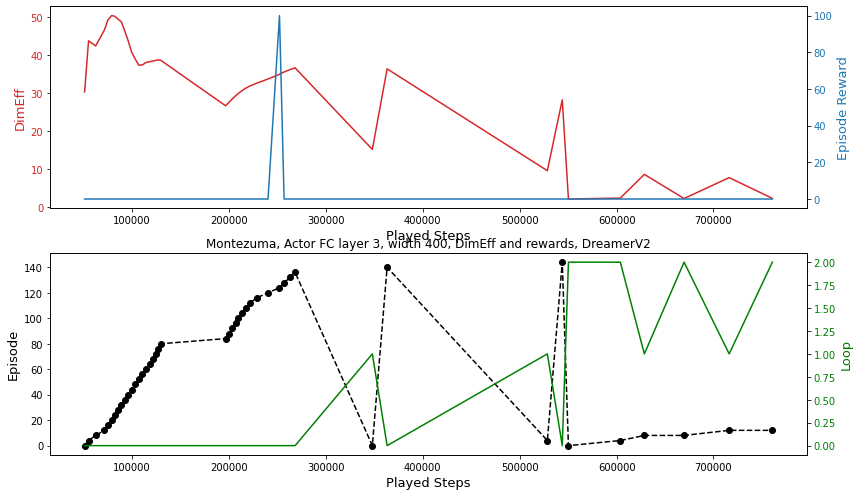

In [94]:
data1 = dims
data2 = rews
data3 = eps
data4 = lps

fig, ax1 = plt.subplots(2, figsize=(12, 7))

color = 'tab:red'
ax1[0].set_xlabel('Played Steps', size=13)
ax1[0].set_ylabel('DimEff', color=color, size=13)
ax1[0].plot(stp, data1, color=color)
ax1[0].tick_params(axis='y', labelcolor=color)

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Episode Reward', color=color, size=13)  # we already handled the x-label with ax1
ax2.plot(stp, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1[1]#.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax3.set_xlabel('Played Steps', size=13)
ax3.set_ylabel('DimEff', color=color, size=13)

ax3.set_ylabel('Episode', color=color, size=13)  # we already handled the x-label with ax1
ax3.plot(stp, data3,'--bo', color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'green'
ax4.set_ylabel('Loop', color=color, size=13)  # we already handled the x-label with ax1
ax4.plot(stp, data4, color=color)
ax4.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'{game}, Actor FC layer 3, width {width_N}, DimEff and rewards, DreamerV2')
plt.show()

## No Reg

In [2005]:
#np.savez("montezuma_N400_Noreg_LP14.npz", data1=data1, data2=data2, data3=data3, data4=data4, stp=stp)

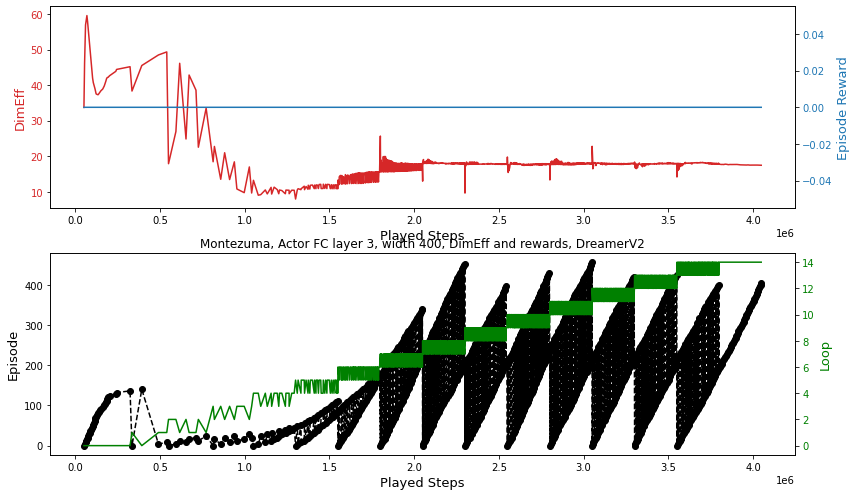

In [1996]:
data1 = dims
data2 = rews
data3 = eps
data4 = lps

fig, ax1 = plt.subplots(2, figsize=(12, 7))

color = 'tab:red'
ax1[0].set_xlabel('Played Steps', size=13)
ax1[0].set_ylabel('DimEff', color=color, size=13)
ax1[0].plot(stp, data1, color=color)
ax1[0].tick_params(axis='y', labelcolor=color)

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Episode Reward', color=color, size=13)  # we already handled the x-label with ax1
ax2.plot(stp, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1[1]#.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax3.set_xlabel('Played Steps', size=13)
ax3.set_ylabel('DimEff', color=color, size=13)

ax3.set_ylabel('Episode', color=color, size=13)  # we already handled the x-label with ax1
ax3.plot(stp, data3,'--bo', color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'green'
ax4.set_ylabel('Loop', color=color, size=13)  # we already handled the x-label with ax1
ax4.plot(stp, data4, color=color)
ax4.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'{game}, Actor FC layer 3, width {width_N}, DimEff and rewards, DreamerV2')
plt.show()

## Reg 0.1

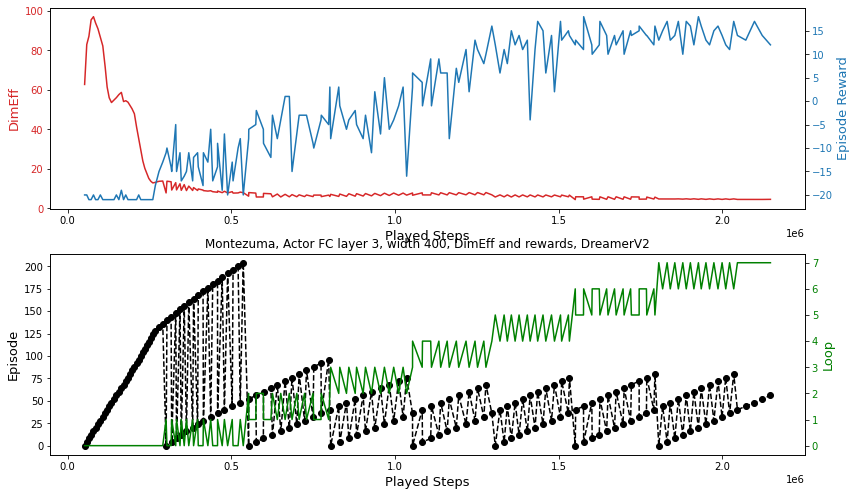

In [1069]:
data1 = dims
data2 = rews
data3 = eps
data4 = lps

fig, ax1 = plt.subplots(2, figsize=(12, 7))

color = 'tab:red'
ax1[0].set_xlabel('Played Steps', size=13)
ax1[0].set_ylabel('DimEff', color=color, size=13)
ax1[0].plot(stp, data1, color=color)
ax1[0].tick_params(axis='y', labelcolor=color)

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Episode Reward', color=color, size=13)  # we already handled the x-label with ax1
ax2.plot(stp, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1[1]#.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax3.set_xlabel('Played Steps', size=13)
ax3.set_ylabel('DimEff', color=color, size=13)

ax3.set_ylabel('Episode', color=color, size=13)  # we already handled the x-label with ax1
ax3.plot(stp, data3,'--bo', color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'green'
ax4.set_ylabel('Loop', color=color, size=13)  # we already handled the x-label with ax1
ax4.plot(stp, data4, color=color)
ax4.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'{game}, Actor FC layer 3, width {width_N}, DimEff and rewards, DreamerV2')
plt.show()

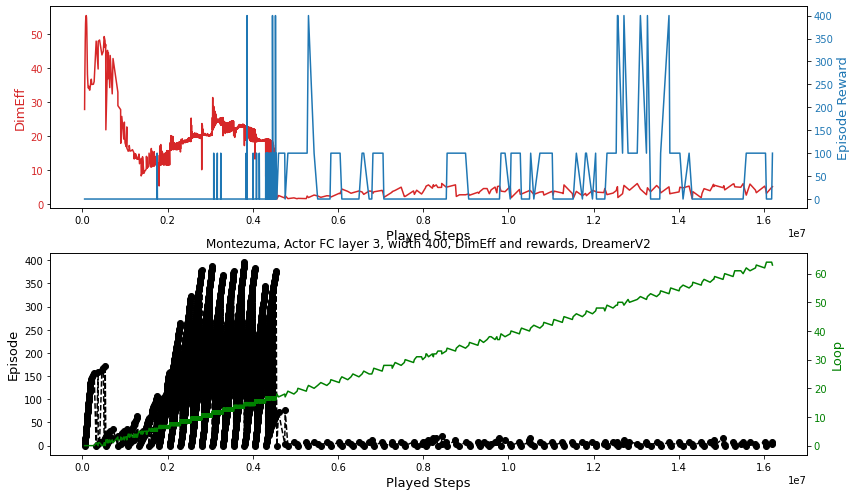

In [589]:
data1 = dims
data2 = rews
data3 = eps
data4 = lps

fig, ax1 = plt.subplots(2, figsize=(12, 7))

color = 'tab:red'
ax1[0].set_xlabel('Played Steps', size=13)
ax1[0].set_ylabel('DimEff', color=color, size=13)
ax1[0].plot(stp, data1, color=color)
ax1[0].tick_params(axis='y', labelcolor=color)

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Episode Reward', color=color, size=13)  # we already handled the x-label with ax1
ax2.plot(stp, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1[1]#.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax3.set_xlabel('Played Steps', size=13)
ax3.set_ylabel('DimEff', color=color, size=13)

ax3.set_ylabel('Episode', color=color, size=13)  # we already handled the x-label with ax1
ax3.plot(stp, data3,'--bo', color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'green'
ax4.set_ylabel('Loop', color=color, size=13)  # we already handled the x-label with ax1
ax4.plot(stp, data4, color=color)
ax4.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'{game}, Actor FC layer 3, width {width_N}, DimEff and rewards, DreamerV2')
plt.show()

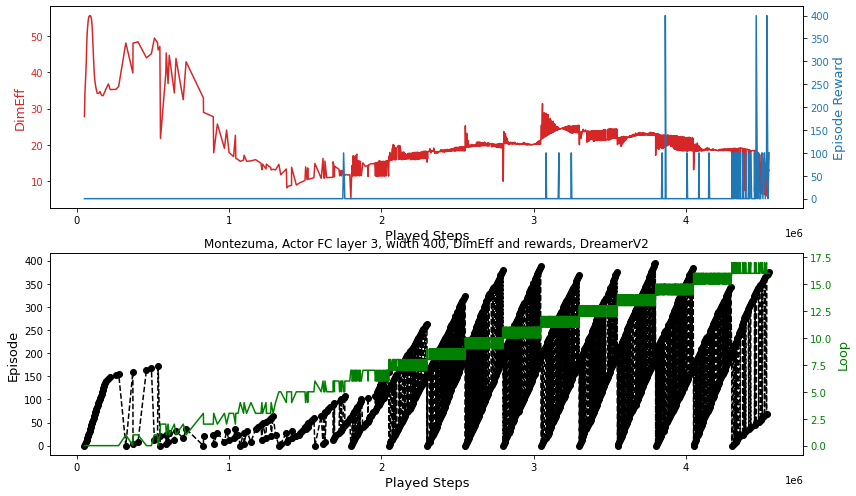

In [857]:
data1 = dims
data2 = rews
data3 = eps
data4 = lps

fig, ax1 = plt.subplots(2, figsize=(12, 7))

color = 'tab:red'
ax1[0].set_xlabel('Played Steps', size=13)
ax1[0].set_ylabel('DimEff', color=color, size=13)
ax1[0].plot(stp, data1, color=color)
ax1[0].tick_params(axis='y', labelcolor=color)

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Episode Reward', color=color, size=13)  # we already handled the x-label with ax1
ax2.plot(stp, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1[1]#.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax3.set_xlabel('Played Steps', size=13)
ax3.set_ylabel('DimEff', color=color, size=13)

ax3.set_ylabel('Episode', color=color, size=13)  # we already handled the x-label with ax1
ax3.plot(stp, data3,'--bo', color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'green'
ax4.set_ylabel('Loop', color=color, size=13)  # we already handled the x-label with ax1
ax4.plot(stp, data4, color=color)
ax4.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'{game}, Actor FC layer 3, width {width_N}, DimEff and rewards, DreamerV2')
plt.show()

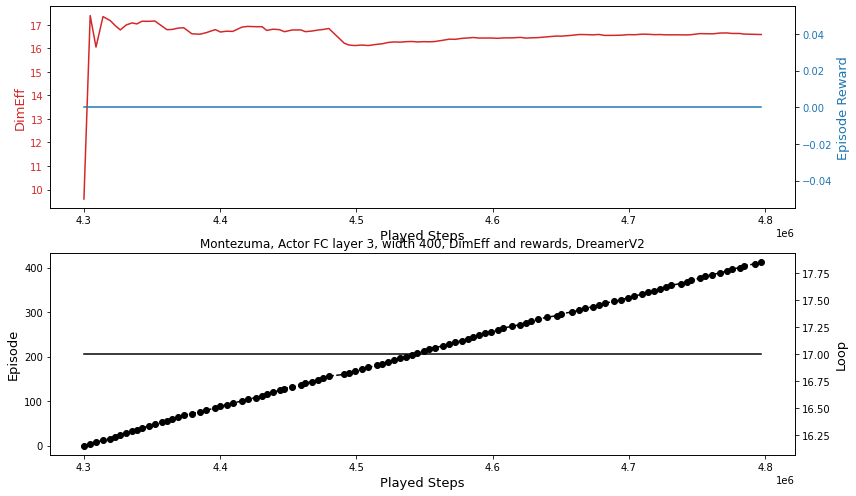

In [772]:
data1 = dims
data2 = rews
data3 = eps
data4 = lps

fig, ax1 = plt.subplots(2, figsize=(12, 7))

color = 'tab:red'
ax1[0].set_xlabel('Played Steps', size=13)
ax1[0].set_ylabel('DimEff', color=color, size=13)
ax1[0].plot(stp, data1, color=color)
ax1[0].tick_params(axis='y', labelcolor=color)

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Episode Reward', color=color, size=13)  # we already handled the x-label with ax1
ax2.plot(stp, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1[1]#.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax3.set_xlabel('Played Steps', size=13)
ax3.set_ylabel('DimEff', color=color, size=13)

ax3.set_ylabel('Episode', color=color, size=13)  # we already handled the x-label with ax1
ax3.plot(stp, data3,'--bo', color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax4.set_ylabel('Loop', color=color, size=13)  # we already handled the x-label with ax1
ax4.plot(stp, data4, color=color)
ax4.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'{game}, Actor FC layer 3, width {width_N}, DimEff and rewards, DreamerV2')
plt.show()

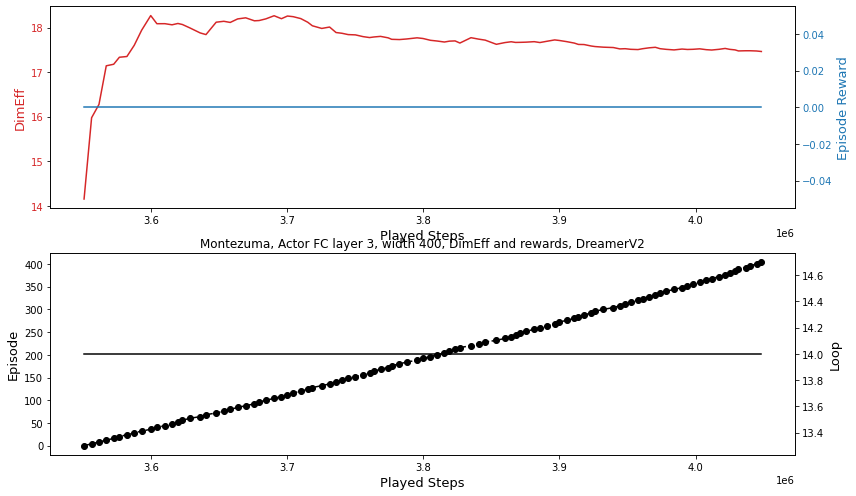

In [261]:
data1 = dims
data2 = rews
data3 = eps
data4 = lps

fig, ax1 = plt.subplots(2, figsize=(12, 7))

color = 'tab:red'
ax1[0].set_xlabel('Played Steps', size=13)
ax1[0].set_ylabel('DimEff', color=color, size=13)
ax1[0].plot(stp, data1, color=color)
ax1[0].tick_params(axis='y', labelcolor=color)

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Episode Reward', color=color, size=13)  # we already handled the x-label with ax1
ax2.plot(stp, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1[1]#.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax3.set_xlabel('Played Steps', size=13)
ax3.set_ylabel('DimEff', color=color, size=13)

ax3.set_ylabel('Episode', color=color, size=13)  # we already handled the x-label with ax1
ax3.plot(stp, data3,'--bo', color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax4.set_ylabel('Loop', color=color, size=13)  # we already handled the x-label with ax1
ax4.plot(stp, data4, color=color)
ax4.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'{game}, Actor FC layer 3, width {width_N}, DimEff and rewards, DreamerV2')
plt.show()

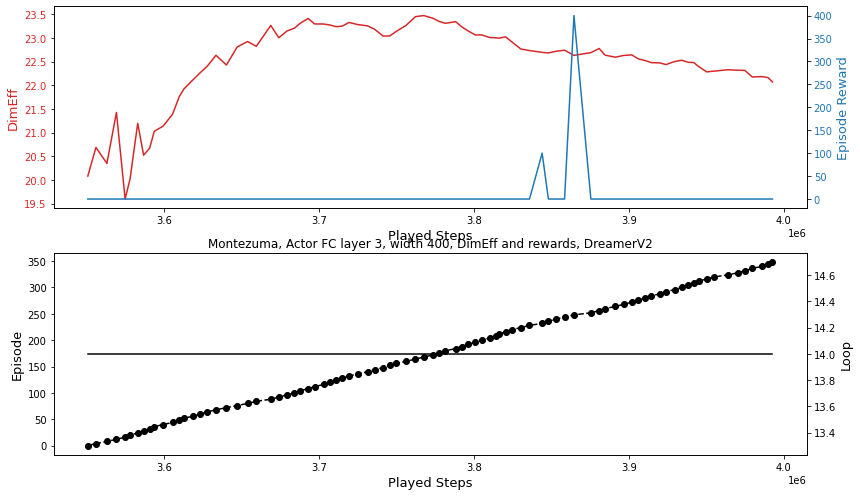

In [228]:
data1 = dims
data2 = rews
data3 = eps
data4 = lps

fig, ax1 = plt.subplots(2, figsize=(12, 7))

color = 'tab:red'
ax1[0].set_xlabel('Played Steps', size=13)
ax1[0].set_ylabel('DimEff', color=color, size=13)
ax1[0].plot(stp, data1, color=color)
ax1[0].tick_params(axis='y', labelcolor=color)

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Episode Reward', color=color, size=13)  # we already handled the x-label with ax1
ax2.plot(stp, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1[1]#.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax3.set_xlabel('Played Steps', size=13)
ax3.set_ylabel('DimEff', color=color, size=13)

ax3.set_ylabel('Episode', color=color, size=13)  # we already handled the x-label with ax1
ax3.plot(stp, data3,'--bo', color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax1[1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax4.set_ylabel('Loop', color=color, size=13)  # we already handled the x-label with ax1
ax4.plot(stp, data4, color=color)
ax4.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'{game}, Actor FC layer 3, width {width_N}, DimEff and rewards, DreamerV2')
plt.show()

## Plotting data

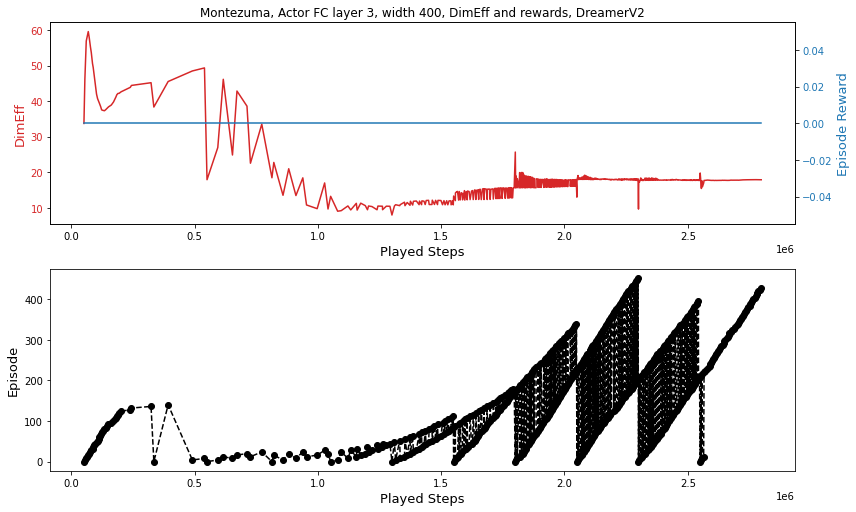

In [23]:
data1 = dims
data2 = rews
data3 = eps

fig, ax1 = plt.subplots(2, figsize=(12, 7))

color = 'tab:red'
ax1[0].set_xlabel('Played Steps', size=13)
ax1[0].set_ylabel('DimEff', color=color, size=13)
ax1[0].plot(stp, data1, color=color)
ax1[0].tick_params(axis='y', labelcolor=color)

ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Episode Reward', color=color, size=13)  # we already handled the x-label with ax1
ax2.plot(stp, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1[1]#.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax3.set_xlabel('Played Steps', size=13)
ax3.set_ylabel('DimEff', color=color, size=13)

ax3.set_ylabel('Episode', color=color, size=13)  # we already handled the x-label with ax1
ax3.plot(stp, data3,'--bo', color=color)
ax3.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'{game}, Actor FC layer 3, width {width_N}, DimEff and rewards, DreamerV2')
plt.show()

## Width

In [24]:
width_N

40

In [25]:
1/(width_N/np.mean(dims[:8]))

0.23341571542035036

In [33]:
np.mean(dims[:8])

9.336628616814014

## Initial DimEff

In [32]:
np.mean(dims[:8])

9.336628616814014

## Final DimEff

In [26]:
np.mean(dims[-20:])

2.5244998912820273

## DimEff difference

In [27]:
np.mean(dims[:8])-np.mean(dims[-20:])

6.812128725531987

In [49]:
np.mean(dims[:8])-np.mean(dims[-20:])

84.3265775565038

## Remaining DimEff ratio

In [33]:
1-(np.mean(dims[:8])-np.mean(dims[-20:]))/np.mean(dims[:8])

0.27038666684628987

In [51]:
1-(np.mean(dims[:8])-np.mean(dims[-20:]))/np.mean(dims[:8])

0.03730106073799033

## Final Rewards

In [29]:
np.mean(rews[-20:])

17.6

In [52]:
np.mean(rews[-20:])

18.45

## Final Loop

In [30]:
np.max(loops)

89

In [31]:
np.max(stp)

22656537